In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import random as rn, math

## The PDF of the Logarithm of X
#### Problem 1

Let  $X$  be a non-negative random variable. Find the PDF of the random variable  $Y=\ln(X)$  for each 
of the following cases:

1. For general $f_X$, find $f_Y(y)=$
$$F_Y(y)=\mathbb{P}(Y\leq y)=\mathbb{P}(\ln(X)\leq y)=\mathbb{P}(X\leq e^y)=F_X(e^y)$$
Differentiate both sides, we have
$$f_Y(y)=f_X(e^y)e^y$$

2. When $f_X(x)=\begin{cases}1/4,&\,\,\text{if $2<x\leq6$,}\\0,&\,\,\text{otherwise,}\end{cases}$
we have $f_X(x)=\begin{cases}g(y),&\,\,\text{if $a<y<b$,}\\0,&\,\,\text{otherwise.}\end{cases}$

Given a formula for $g(y)$ and the valyes of $a$ and $b$
$$g(y)=\frac{e^y}{4},\,\,\,\,\,\text{where $\ln(2)<y\leq\ln(6)$}$$

3. When $f_X(x)=\begin{cases}2(x-1),&\,\,\text{if $1<x\leq2$,}\\0,&\,\,\text{otherwise,}\end{cases}$
we have $f_X(x)=\begin{cases}g(y),&\,\,\text{if $a<y<b$,}\\0,&\,\,\text{otherwise.}\end{cases}$

Given a formula for $g(y)$ and the valyes of $a$ and $b$
$$g(y)=2e^{2y}-e^{y},\,\,\,\,\,\text{where $0<y\leq\ln(2)$}$$

## Functions of the Standard Normal
#### Problem 2
The random variable $X$ has a standard normal distribution. Find PDF of the random variable $Y$, where

1. $Y=5X-7$

For any $Y=aX+b$ with $a\neq 0$, we have $f_Y(y)=\frac{1}{|a|}f_X(\frac{y-b}{a})$; thus
$$f_Y(y)=\frac{1}{|5|}f_X\left(\frac{y+7}{5}\right)$$

2. $Y=X^2-2X$ for $y\geq-1$

By adding $1$ on both sides, we have $Y+1=X^2-2X+1=(X-1)^2$ where $Y+1\geq 0$. Then,
\begin{align*}
F_Y(y)=\mathbb{P}(Y\leq y)&=\mathbb{P}(Y+1\leq y+1)\\
&=\mathbb{P}((X-1)^2\leq y+1)\\
&=\mathbb{P}(-\sqrt{y+1}\leq X-1\leq\sqrt{y+1})\\
&=\mathbb{P}(-\sqrt{y+1}+1\leq X\leq\sqrt{y+1}+1)\\
&=F_X(\sqrt{y+1}+1)-F_X(-\sqrt{y+1}+1)
\end{align*}

Differentiate both sides, we obtain
$$f_Y(y)=\frac{f_X(\sqrt{y+1}+1)+f_X(-\sqrt{y+1}+1)}{2\sqrt{y+1}}$$

## The PDF of the Maximum
#### Problem 3
Let $X$ and $Y$ be independent random variables, each uniformly distributed on the interval $[0, 1]$.

1. Let $Z=\max\{X, Y\}$. Find the PDF of $Z$.

For all $x$ and $y$ in $[0,1]$, we have $z\geq x$ and $z\geq y$. So
\begin{align*}
F_Z(z)&=\mathbb{P}(Z\leq z)\\
&=\mathbb{P}(\max\{X, Y\}\leq z)\\
&=\mathbb{P}(X\leq z\cap Y\leq z)\\
&=\mathbb{P}(X\leq z)\mathbb{P}(Y\leq z)\,\,\,\text{By independence}\\
&=z\times z\\
&=z^2
\end{align*}

Differentiate both sides, we have 
\begin{align*}
\frac{d}{dz}F_Z(z)&=\frac{d}{dz}z^2\\
f_Z(z)&=2z
\end{align*}

2. Let $Z=\max\{2X, Y\}$. Find the PDF of $Z$.

By doing similar calculations from part one, 
$$F_Z(z)=\mathbb{P}(2X\leq z)\mathbb{P}(Y\leq z)=F_X(z/2)F_Y(z)$$

For all $z$ in $(0, 1)$, we have $F_X(z/2)=F_Y(y)=z$.
$$\frac{d}{dz}F_Z(z)=\frac{d}{dz}\frac{z^2}{2}\rightarrow f_Z(z)=z$$

For all $z$ in $(1, 2)$, we have $F_X(z/2)=z, F_Y(y)=1$.
$$\frac{d}{dz}F_Z(z)=\frac{d}{dz}\frac{z\cdot1}{2}\rightarrow f_Z(z)=\frac{1}{2}$$

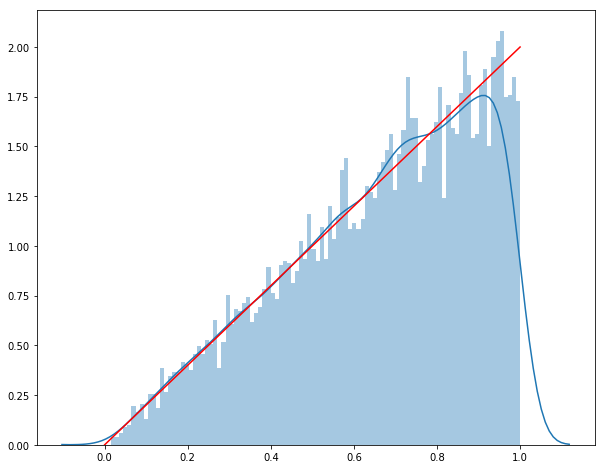

In [2]:
z = np.max([np.random.uniform(0, 1, 10000), np.random.uniform(0, 1, 10000)], axis = 0)
pdf = 2*np.arange(0, 1, 1/10000)

plt.figure(figsize = (10, 8))
sns.distplot(z, bins=100, hist=True)
sns.lineplot(np.arange(0, 1, 1/10000), pdf, color = "r")
plt.show()

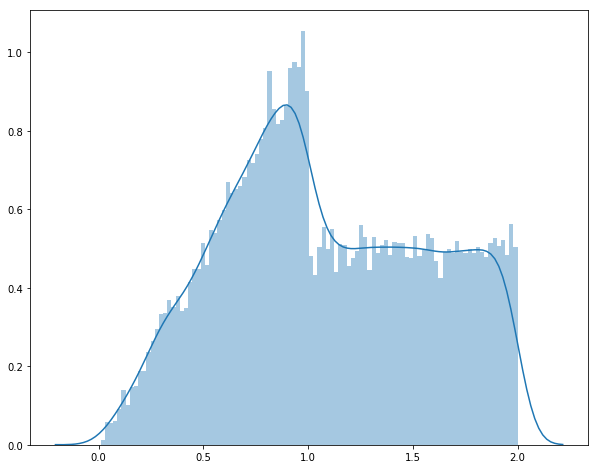

In [3]:
z1 = np.max([np.random.uniform(0, 1, 10000), np.random.uniform(0, 1, 10000)], axis = 0)
z2 = np.max([np.random.uniform(1, 2, 10000), [0]*10000], axis = 0)

plt.figure(figsize = (10, 8))
sns.distplot(np.concatenate([z1, z2]), bins=100, hist=True)
plt.show()

If $Z=\max\{X_1, X_2, \dots, X_n\}$ where $X_i\sim\mathsf{U}(0, 1)$ for all $i$, we have
$$f_Z(z)=nz^{n-1}$$

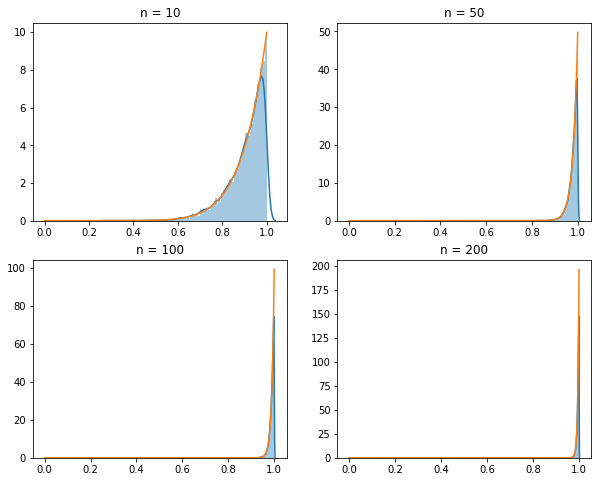

In [4]:
N = [10, 50, 100, 200]
fig, ax = plt.subplots(2, 2, figsize = (10, 8))

for i in range(len(N)):
    z = np.max([np.random.uniform(0, 1, 10000) for _ in range(N[i])], axis = 0)
    x = np.arange(0, 1, 1/10000)
    pdf = N[i]*x**(N[i]-1)
    sns.distplot(z, bins=100, hist=True, ax = ax[i//2][i%2])
    sns.lineplot(x, pdf, ax = ax[i//2][i%2])
    ax[i//2][i%2].set_title("n = "+str(N[i]))
plt.show()

## Convolution Calculations
#### Problem 4

1. Let the discrete random variable $X$ be uniform on $\{0,1,2\}$ and let the discrete random variable $Y$ be uniform on $\{3,4\}$. Assume that $X$ and $Y$ are independent. Find the PMF of $X+Y$ using convolution. Determine the values of the constants $a,b,c$, and $d$ that appears in the following specification of the PMF.
$$p_{X+Y}(z)\begin{cases}
a,&\,\,\,z=3,\\
b,&\,\,\,z=4,\\
c,&\,\,\,z=5,\\
d,&\,\,\,z=6,\\
0,&\,\,\,\text{otherwise}
\end{cases}$$

There are six outcomes for $Z=X+Y$ and they are $\{(3,0), (3,1), (3,2), (4,0), (4,1), (4,2)\}$.
$$p_{X+Y}(z)\begin{cases}
a=\frac{1}{2}\cdot\frac{1}{3}=\frac{1}{6},&\,\,\,z=3,\\
b=2\cdot\frac{1}{2}\cdot\frac{1}{3}=\frac{1}{3},&\,\,\,z=4,\\
c=2\cdot\frac{1}{2}\cdot\frac{1}{3}=\frac{1}{3},&\,\,\,z=5,\\
d=\frac{1}{2}\cdot\frac{1}{3}=\frac{1}{6},&\,\,\,z=6,\\
0,&\,\,\,\text{otherwise}
\end{cases}$$

2. Let the random variable  $X$  be uniform on  $[0,2]$  and the random variable  $Y$  be uniform on  $[3,4]$ . (Note that in this case,  $X$  and  $Y$  are continuous random variables.) Assume that $X$  and  $Y$  are independent. Let  $Z=X+Y$ . Find the PDF of  $Z$  using convolution. The following figure shows a plot of this PDF. Determine the values of  $a ,  b ,  c ,  d $, and  $e $.
![image1](https://prod-edxapp.edx-cdn.org/assets/courseware/v1/eb890fd6f149a4a75094d2b88ecd2545/asset-v1:MITx+6.431x+2T2019+type@asset+block/images_chap4_convolution1.jpg)

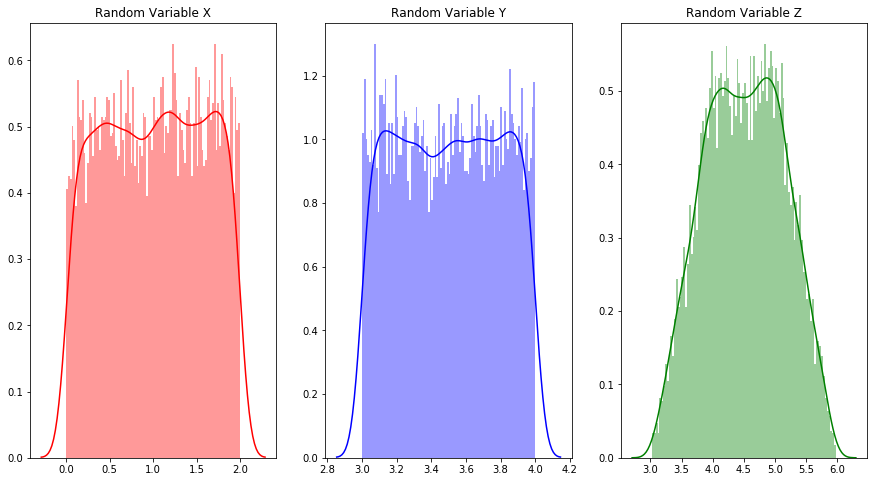

In [5]:
X = np.random.uniform(0, 2, 10000)
Y = np.random.uniform(3, 4, 10000)
Z = X+Y

fig, ax = plt.subplots(1, 3, figsize = (15, 8))
rv = [X, Y, Z]
colors = ["r", "b", "g"]
for i in range(3):
    sns.distplot(rv[i], bins = 100, hist = True, color = colors[i], ax = ax[i])
    ax[i].set_title("Random Variable {}".format("XYZ"[i]))
plt.show()

## Covariance of the Multinomial
#### Problem 5
Consider  $n$  independent rolls of a  $k $-sided fair die with  $k\geq2$ : the sides of the die are labelled  $1,2,\dots,k$ , and each side has probability  $1/k$ . Let the random variable  $X_i$  denote the number of rolls that result in side  $i$ . Thus, the random vector  $(X_1,\dots,X_k)$  has a multinomial distribution.

1. We have $x_1+x_2+\cdots+x_k=n$ which equivalent to $x_1=n-(x_2+\cdots+x_k)$. When $(x_2+\cdots+x_k)$ increases, $x_1$ decreases. $X_1,\dots,X_k$ are negatively correlated.

2.  Find the covariance,  $\mathrm{Cov}(X_1,X_2)$ , of  $X_1$  and  $X_2$ . Express your answer as a function of  $n$  and  $k$  using standard notation. 
$$\mathrm{Cov}(X_1, X_2)=E[X_1X_2]-E[X_1]E[X_2]$$
Let $A_r$ and $B_r$ be identical independent Bernoulli random variables with parameter $1/k$ that equal to $1$ if and only if their $r$th roll result their faces. We have 
$$X_1=\sum_{r=1}^{n}A_r,\,\,\,\,\,X_2=\sum_{r=1}^{n}B_r$$
So, 
\begin{align*}
E[X_1X_2]&=E\left[\sum_{r=1}^{n}A_r\sum_{r=1}^{n}B_r\right]\\
&=E\left[\sum_{r=1}^{n}\sum_{r=1}^{n}A_rB_r\right]\\
&=E\left[\sum_{r=1}^{n}A_rB_r+\sum_{s\neq t}A_sB_t\right]\\
&=E\left[\sum_{r=1}^{n}A_rB_r\right]+E\left[\sum_{s\neq t}A_sB_t\right]\\
&=E\left[\sum_{s\neq t}A_sB_t\right]\,\,\,\text{There is 0 probability that a die rolls more than one faces}\\
&=\sum_{s\neq t}E[A_sB_t]\\
&=\sum_{s\neq t}E[A_s]E[B_t]\\
&=\sum_{s\neq t}E[A_1]E[B_1]\,\,\,\text{For all $s, t$, we have $E[A_s]=E[A_1]$ and $E[B_t]=E[B_1]$}\\
&=(n^2-n)\cdot\frac{1}{k}\cdot\frac{1}{k}
\end{align*}

$$E[X_1]E[X_2]=E\left[\sum_{r=1}^{n}A_r\right]E\left[\sum_{r=1}^{n}A_r\right]=\sum_{r=1}^{n}E[A_1]\sum_{r=1}^{n}E[B_1]=\frac{n^2}{k^2}$$

Combining above results, we obtain
$$\mathrm{Cov}(X_1, X_2)=(n^2-n)\cdot\frac{1}{k}\cdot\frac{1}{k}-\frac{n^2}{k^2}=-\frac{n}{k^2}$$

3. Suppose now that the die is biased, with a probability  $p_i\neq0$  that the result of any given die roll is  $i$ , for  $i=1,2,\dots,k$ . We still consider  $n$  independent rolls of this biased die and define  $X_i$  to be the number of rolls that result in side  $i $. Generalize your answer to part 2: Find  $\mathrm{Cov}(X_1,X_2)$  for this case of a biased die.

Apply similar calculation, we can have 
$$\mathrm{Cov}(X_1, X_2)=-np_1p_2$$

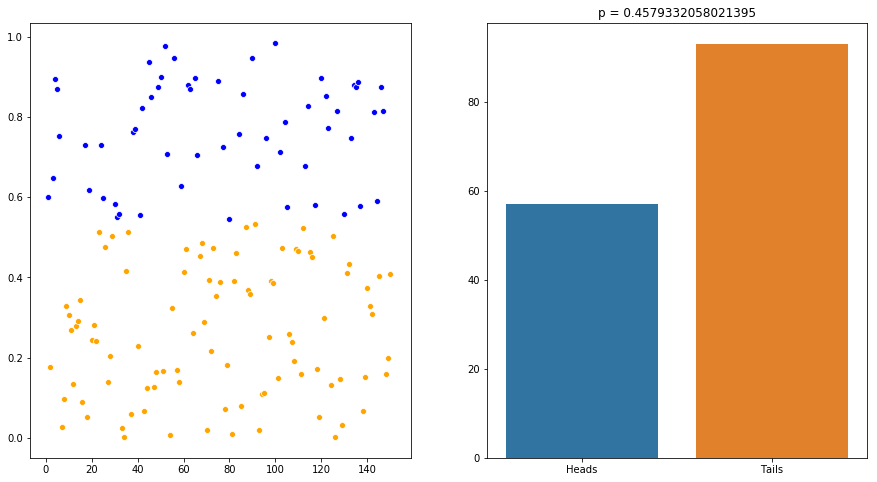

In [6]:
p = np.random.uniform(0, 1)
n = 150
heads = []
tails = []
cor1 = []
cor2 = []

for i in range(1, n+1):
    roll = np.random.uniform(0, 1)
    if roll >= p:
        heads.append(roll)
        cor1.append(i)
    else:
        tails.append(roll)
        cor2.append(i)

fig, ax = plt.subplots(1, 2, figsize = (15, 8))
sns.scatterplot(x=cor1, y=heads, color = 'b', ax = ax[0])
sns.scatterplot(x=cor2, y=tails, color = 'orange', ax = ax[0])
sns.barplot(x=["Heads", "Tails"], y = [len(heads), len(tails)], 
            order = ["Heads", "Tails"],
            ax = ax[1])
plt.title("p = {}".format(1 - p))
plt.show()

## Correlation Coefficients
#### Problem 6
Consider random variables  $X $,  $Y$  and  $Z$ , which are assumed to be pairwise uncorrelated (i.e.,  $X$  and  $Y$  are uncorrelated,  $X$  and  $Z$  are uncorrelated, and  $Y$  and $ Z $ are uncorrelated). Suppose that

* $E[X]=E[Y]=E[Z]=0 $,
* $E[X^2]=E[Y^2]=E[Z^2]=1$ ,

Find the correlation coefficients  $\rho(X−Y,X+Y)$ ,  $\rho(X+Y,Y+Z)$ , and  $\rho(X,Y+Z)$.

Note that $0=\mathsf{Cov}(X, Y)=E[XY]-E[X]E[Y]=E[XY]$, $0=\mathsf{Cov}(X, Z)=E[XZ]-E[X]E[Z]=E[XZ]$, $0=\mathsf{Cov}(Y, Z)=E[YZ]-E[Y]E[Z]=E[YZ]$ since $X, Y, Z$ are uncorrelated.

\begin{align*}
\rho(X−Y,X+Y)&=\frac{\mathsf{Cov}(X-Y, X+Y)}{\sqrt{\mathsf{Var}(X-Y)}\sqrt{\mathsf{Var}(X+Y)}}\\
&=\frac{E[(X+Y)(X-Y)]-E[X+Y]E[X-Y]}{\sqrt{\mathsf{Var}(X-Y)}\sqrt{\mathsf{Var}(X+Y)}}\\
&=\frac{E[X^2+XY-XY-Y^2]-(E[X]+E[Y])(E[X]-E[Y])}{\sqrt{\mathsf{Var}(X-Y)}\sqrt{\mathsf{Var}(X+Y)}}\\
&=\frac{E[X^2-Y^2]-0}{\sqrt{\mathsf{Var}(X-Y)}\sqrt{\mathsf{Var}(X+Y)}}\\
&=\frac{E[X^2]-E[Y^2]}{\sqrt{\mathsf{Var}(X-Y)}\sqrt{\mathsf{Var}(X+Y)}}\\
&=0
\end{align*}

\begin{align*}
\rho(X+Y,X+Z)&=\frac{\mathsf{Cov}(X+Y, X+Z)}{\sqrt{\mathsf{Var}(X+Y)}\sqrt{\mathsf{Var}(X+Z)}}\\
&=\frac{\mathsf{Cov}(X+Y, X)+\mathsf{Cov}(X+Y, Z)}{\sqrt{\mathsf{Var}(X+Y)}\sqrt{\mathsf{Var}(X+Z)}}\\
&=\frac{\mathsf{Cov}(X, X)+\mathsf{Cov}(Y, X)+\mathsf{Cov}(X, Z)+\mathsf{Cov}(Y, Z)}{\sqrt{\mathsf{Var}(X+Y)}\sqrt{\mathsf{Var}(X+Z)}}\\
&=\frac{\mathsf{Var}(X)}{\sqrt{\mathsf{Var}(X+Y)}\sqrt{\mathsf{Var}(X+Z)}}\\
&=\frac{E[X^2]}{\sqrt{\mathsf{Var}(X+Y)}\sqrt{\mathsf{Var}(X+Z)}}\\
\end{align*}

$$\mathsf{Var}(X+Y)=E[(X+Y)^2]-(E[X+Y])^2=E[X^2+2XY+Y^2]=E[X^2]+E[Y^2]=2$$
$$\mathsf{Var}(X+Z)=E[(X+Z)^2]-(E[X+Z])^2=E[X^2+2XZ+Z^2]=E[X^2]+E[Z^2]=2$$

Thus, 
$$\rho(X+Y,X+Z)=\frac{E[X^2]}{\sqrt{\mathsf{Var}(X+Y)}\sqrt{\mathsf{Var}(X+Z)}}=\frac{1}{2}$$

\begin{align*}
\rho(X, Y+Z)&=\frac{\mathsf{Cov}(X, Y+Z)}{\sqrt{\mathsf{Var}(X)}\sqrt{\mathsf{Var}(Y+Z)}}\\
&=\frac{\mathsf{Cov}(X, Y)+\mathsf{Cov}(X, Z)}{\sqrt{\mathsf{Var}(X)}\sqrt{\mathsf{Var}(Y+Z)}}\\
&=0
\end{align*}

## Sum of a Random Number of R.V.'s
#### Problem 7
A fair coin is flipped independently until the first Heads is observed. Let the random variable  $K$  be the number of tosses until the first Heads is observed plus $1$. For example, if we see $TTTHTH$, then  $K=5$ . For  $k=1,2,\dots,K$ , let  $X_k $ be a continuous random variable that is uniform over the interval  $[0,5]$ . The  $X_k$  are independent of one another and of the coin flips. Let  $Y=\sum_{k=1}^{K}X_k $. Find the mean and variance of  $Y$ . You may use the fact that the mean and variance of a geometric random variable with parameter  $p$  are  $1/p$  and  $(1−p)/p^2$ , respectively.

Suppose $K=t$, we have 
$$E[Y\,|\,K=t]=E\left[\sum_{k=1}^{K}X_k\,\Big|\,K=t\right]=E\left[\sum_{k=1}^{t}X_k\,\Big|\,K=t\right]=E[X_1+X_2+\cdots+X_t]=tE[X_1]$$
$$\mathsf{Var}(Y\,|\,K=t)=\mathsf{Var}\left(\sum_{k=1}^{K}X_k\,\Big|\,K=t\right)=\mathsf{Var}\left(\sum_{k=1}^{t}X_k\,\Big|\,K=t\right)=\mathsf{Var}\left(\sum_{k=1}^{t}X_k\right)=t\mathsf{Var}(X_1)$$

These tell us $E[Y\,|\,K]=KE[X_1]$ and $\mathsf{Var}(Y\,|\,K)=K\mathsf{Var}(X_1)$; thus, by the law of iterated expectations and the law of total variances,
$$E[Y]=E[E[Y\,|\,K]]=\sum_{k=1}^{K}p_K(k)E[Y\,|\,K=k]=\sum_{k=1}^{K}p_K(k)kE[X_1]=E[K]E[X_1]$$
$$\mathsf{Var}(Y)=E[\mathsf{Var}(Y\,|\,K)]+\mathsf{Var}(E[Y\,|\,K])=E[K]\mathsf{Var}(X_1)+(E[X_1])^2\mathsf{Var}(K)$$

Note that random variable $K-1$ is the number of tosses until the first Heads is observed, so it is a Geometric random variable with parameter $1/2$ since the coin is fair. We have
$$E[K-1]=2,\,\,\,\,\,\mathsf{Var}(K-1)=2\Longrightarrow E[K]=3,\,\,\,\,\,\mathsf{Var}(K)=2$$

Therefore, 
$$E[Y]=E[K]E[X_1]=3\cdot 2.5=7.5$$
$$\mathsf{Var}(Y)=E[K]\mathsf{Var}(X_1)+(E[X_1])^2\mathsf{Var}(K)=\frac{3\cdot 25}{12}+\frac{25}{4}\cdot 2=\frac{75}{4}$$

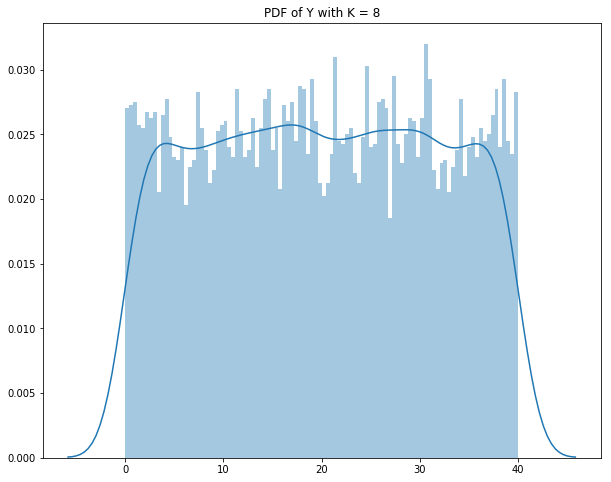

In [7]:
def coin_tosses():
    p = 0.5; k = 0
    found = False
    while not found:
        k += 1
        toss = np.random.uniform(0, 1)
        if toss > p:
            found = True
            k += 1
            
    return k

def pdf_Y():
    X_k = np.random.uniform(0, 5, 10000)
    K = coin_tosses()
    Y = sum([X_k]*K)
    
    return Y, K

plt.figure(figsize = (10, 8))
Y, K = pdf_Y()
sns.distplot(Y, bins = 100, hist = True)
plt.title("PDF of Y with K = {}".format(str(K)))
plt.show()

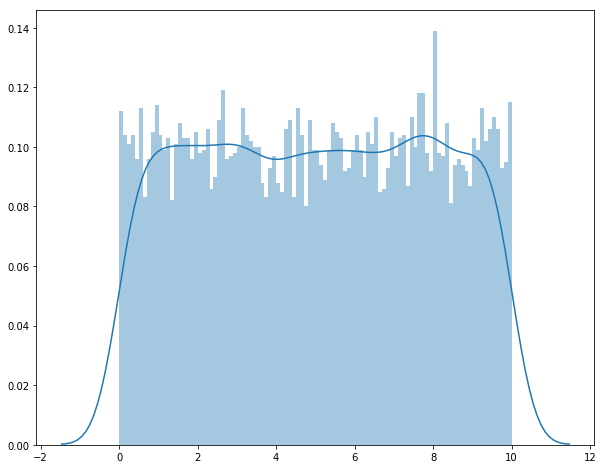

In [8]:
averages = []
for i in range(10000):
    y, _ = pdf_Y()
    averages.append(np.mean(y))
    
plt.figure(figsize = (10, 8))
sns.distplot(y, bins = 100, hist = True)
plt.show()